<a href="https://colab.research.google.com/github/shrishtinigam/Chronic-Kidney-Disease-Prediction/blob/main/D1_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Naive Bayes Classification on Dataset - 1

In [ ]:
import pandas as pd          
import numpy as np

In [ ]:
df=pd.read_csv('/content/dataset_1.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [ ]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [ ]:
df.shape

(400, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2,random_state =42)

In [ ]:
model=GaussianNB()   #1-91 2-93 3-92 4-95 .....5,6,7,8,9,10<95%
model.fit(X_train,Y_train) 
prediction=model.score(X_test,Y_test)
print("Accuracy:",prediction)
predicts=model.predict(X_test)

Accuracy: 0.95


In [ ]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [ ]:
data=[75,1.01,2,2,1,34,0.4,137.23,4.23,14.6,5000,4.6,1]
print_result(data)
data=[80,1.02,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.2,1]
print_result(data)

You are suffering from Chronic Kidney Disease
You are suffering from Chronic Kidney Disease


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts))
print('Recall: %.3f' % recall_score(Y_test, predicts))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts))
print('F1-Score: %.3f' % f1_score(Y_test, predicts))

Precision: 1.000
Recall: 0.923
Accuracy: 0.950
F1-Score: 0.960


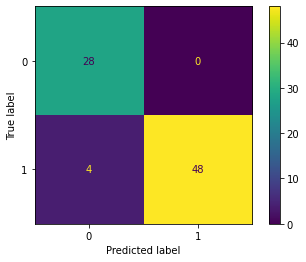

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())